# Unit I: Climate Change Module

## Opening Tutorial: Examining CO2 trends in python

- Example from <http://climate.nasa.gov/vital-signs/carbon-dioxide/>
- Raw data from <https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt>

In [1]:
!pip install plotnine

In [2]:
import pandas as pd
from plotnine import *

In [3]:
columns = ['year', 'month', 'decimal_date', 'average', 'smooth', 'std_days', 'uncertainty', 'empty']
df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt",
                  sep = '\\s+',
                  comment = '#',
                  header = None,
                  names = columns
                  )
df

,year,month,decimal_date,average,smooth,std_days,uncertainty,empty
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
805,2025,4,2025.2917,429.64,427.13,23,0.73,0.29
806,2025,5,2025.3750,430.51,427.26,23,0.39,0.16
807,2025,6,2025.4583,429.61,427.16,26,0.71,0.27
808,2025,7,2025.5417,427.87,427.45,24,0.31,0.12


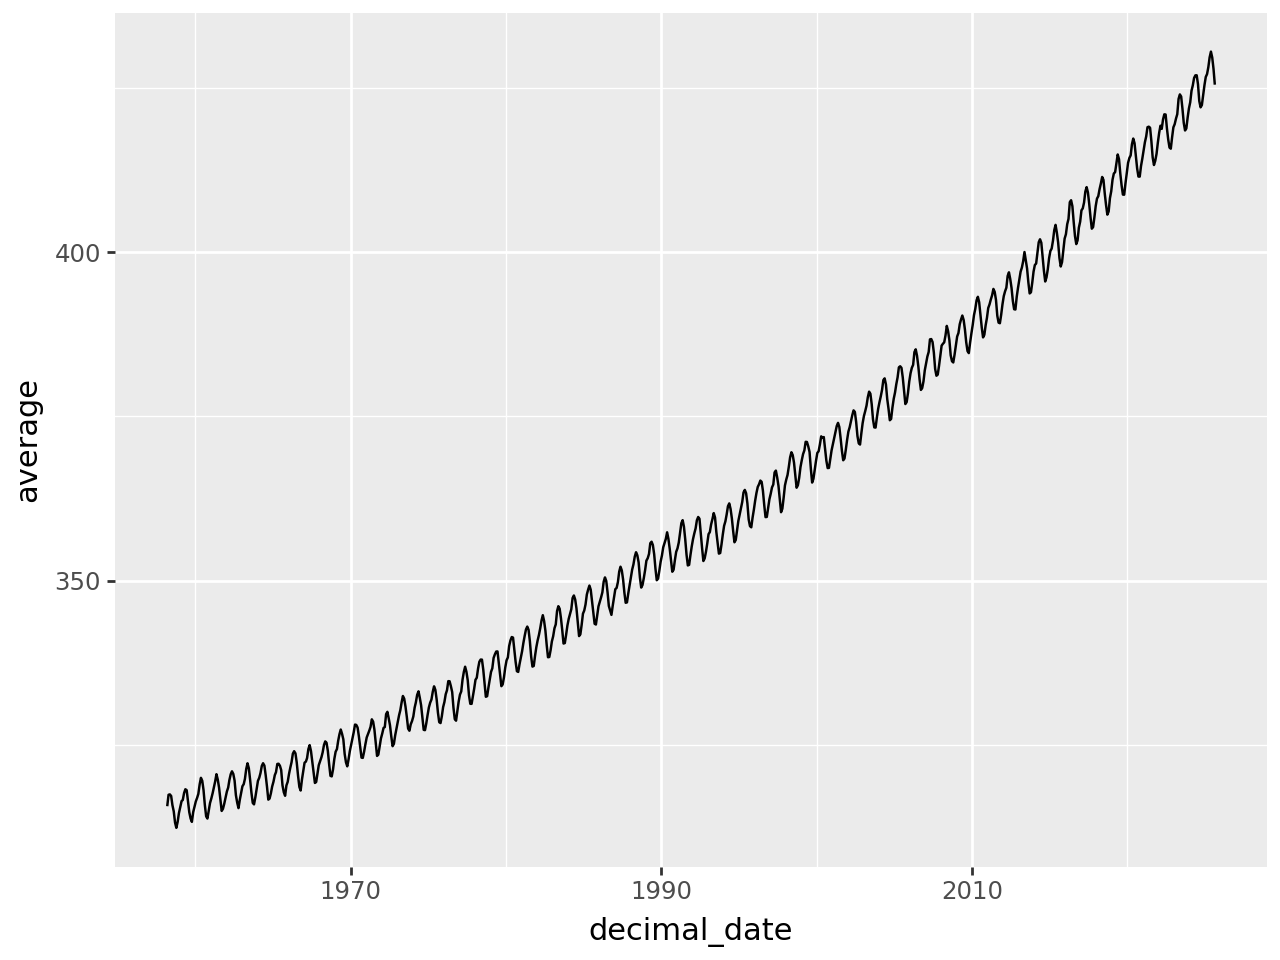

In [4]:
ggplot(df, aes(x="decimal_date", y="average")) + geom_line()

Which months are the CO2 values at the maximum? Minimum?  Why is this?

:::{tip} Exercise 1

# Temperature Data

Each of the last years has consecutively set new records on global climate.  In this section we will analyze global mean temperature data.

Data from: <http://climate.nasa.gov/vital-signs/global-temperature>

## Question 1:

Describe the data set to the best of your ability given the documentation provided.  Describe what kind of column each data contains and what units it is measured in.  Then address our three key questions in understanding this data:

- How are the measurements made? What is the associated measurement uncertainty?
- What is the resolution of the data?
- Are their missing values? How should they be handled?

## Question 2:

Construct the necessary code to import and prepare for manipulation the following data set: <http://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt>

In [5]:
url = "https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt"
columns2 = ["Year", "No_smoothing", "Lowess(5)"]
df2 = pd.read_csv(url,
                  skiprows=5,
                  sep = '\\s+',
                  comment = '#',
                  header = None,
                  names = columns2
                  )
df2                

,Year,No_smoothing,Lowess(5)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24
...,...,...,...
137,2017,0.92,0.91
138,2018,0.85,0.92
139,2019,0.98,0.93
140,2020,1.02,0.94


## Question 3:

Plot the trend in global mean temperatures over time.  Describe what you see in the plot and how you interpret the patterns you observe.

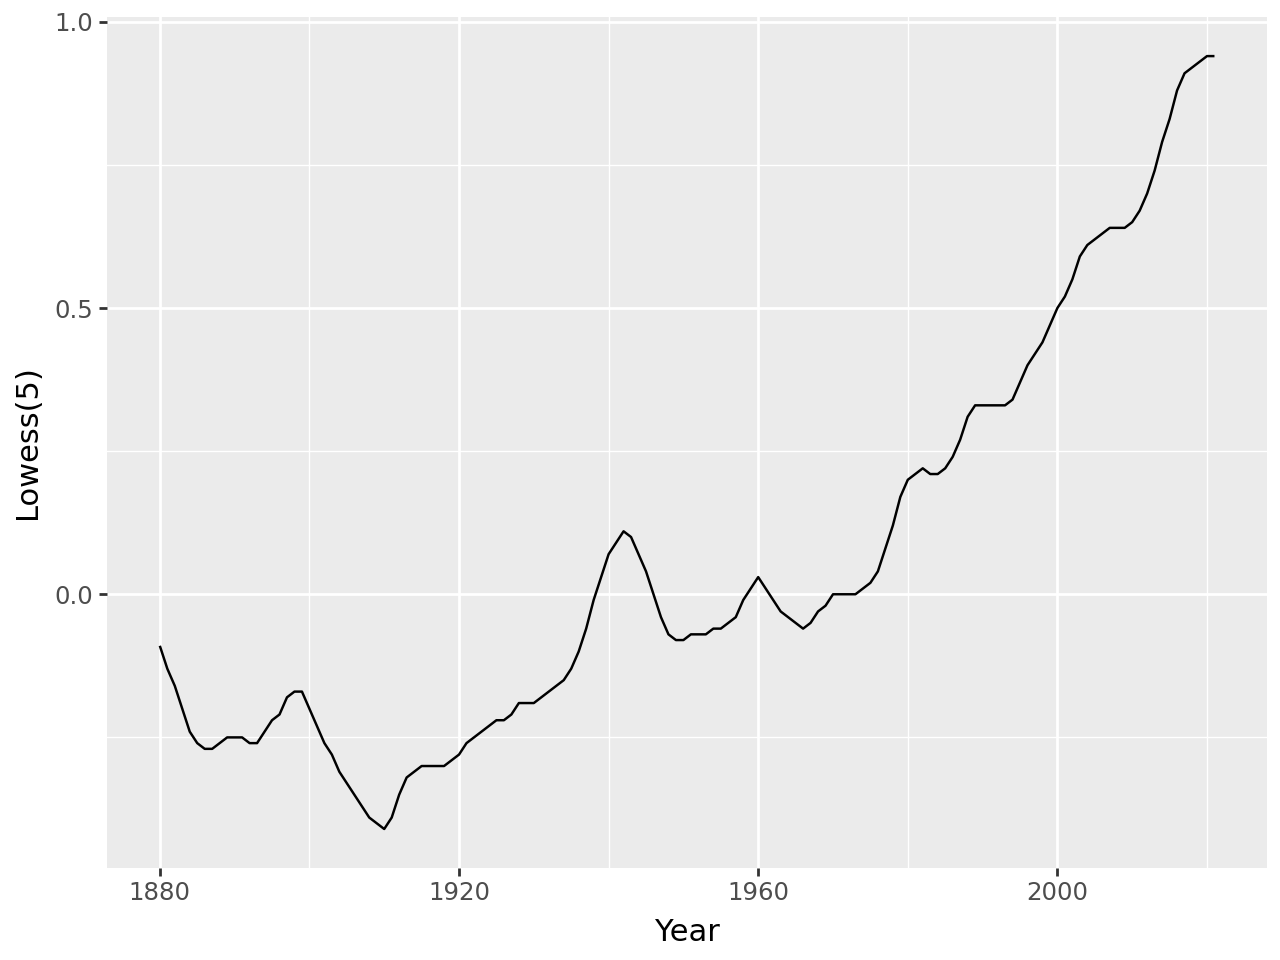

In [6]:
ggplot(df2, aes(x="Year", y="Lowess(5)")) + geom_line()

# Exercise II: Melting Ice Sheets?

- Data description: <http://climate.nasa.gov/vital-signs/land-ice/>
- Raw data file: <http://climate.nasa.gov/system/internal_resources/details/original/499_GRN_ANT_mass_changes.csv>

## Question 1:

- Describe the data set: what are the columns and units? Where do the numbers come from? 
- What is the uncertainty in measurment? Resolution of the data? Interpretation of missing values?

## Question 2:

Construct the necessary code to import this data set.

In [7]:
url = "http://climate.nasa.gov/system/internal_resources/details/original/499_GRN_ANT_mass_changes.csv"
columns3 = ["TIME (year.decimal)", "Greenland mass (Gt)", "Antarctica mass (Gt)"]

df3 = pd.read_csv(url,
                  skiprows=10,
                  sep=',',
                  comment='#',
                  header=None,
                  names=columns3,
                  )

df3

,TIME (year.decimal),Greenland mass (Gt),Antarctica mass (Gt)
0,2002.29,1490.68,967.20
1,2002.35,1485.69,978.55
2,2002.62,1286.84,512.02
3,2002.71,1257.85,858.85
4,2002.79,1257.17,693.87
...,...,...,...
135,2014.45,-1672.08,-1021.70
136,2014.62,-1985.59,-1067.84
137,2014.71,-2024.82,-780.87
138,2014.79,-1973.96,-904.38


## Question 3:

Plot the data and describe the trends you observe.

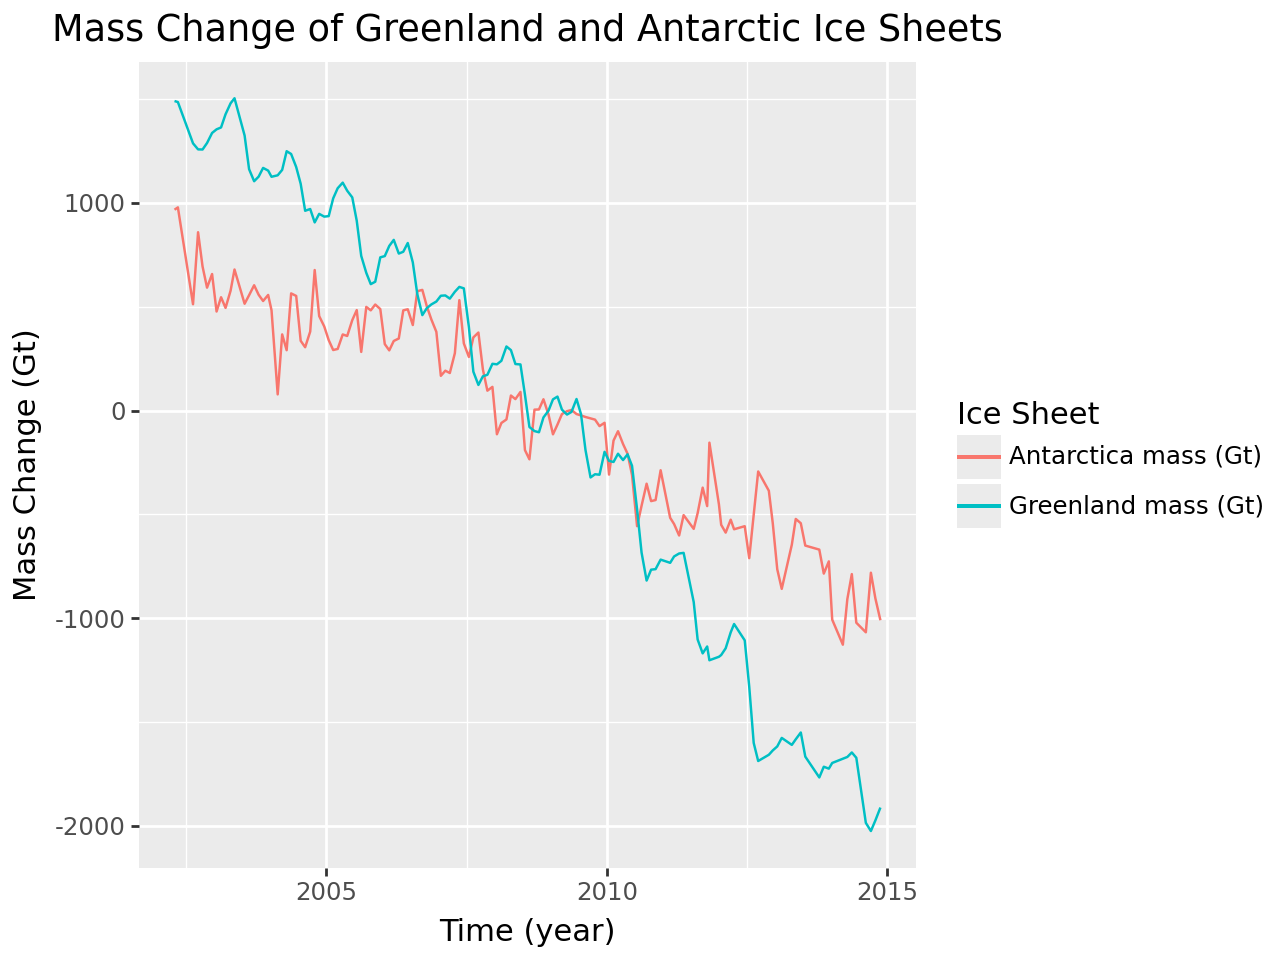

In [8]:
df3_melted = df3.melt(
    id_vars="TIME (year.decimal)",
    value_vars=["Greenland mass (Gt)", "Antarctica mass (Gt)"],
    var_name="mass_type",
    value_name="mass_change_Gt",
).dropna()

plot = (ggplot(df3_melted, aes(x="TIME (year.decimal)", y="mass_change_Gt", color="mass_type"))
        + geom_line()
        + labs(
            title="Mass Change of Greenland and Antarctic Ice Sheets",
            x="Time (year)",
            y="Mass Change (Gt)",
            color="Ice Sheet"
        ))
plot

# Exercise III: Rising Sea Levels?

- Data description: <http://climate.nasa.gov/vital-signs/sea-level/>
- Raw data file: <http://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt>


## Question 1:

- Describe the data set: what are the columns and units? 
- Where do these data come from? 
- What is the uncertainty in measurment? Resolution of the data? Interpretation of missing values?

## Question 2:

Construct the necessary code to import this data set.  Try to reshape to a "tidy data" format where each column is variable and each row an observation.  For instance, the columns "greenland ice mass" and "antartica ice mass" conflate two variables being measured: the mass of ice observed and the location at which it is observed.  Seek to have a unique column for each variable. 

In [9]:
url = "https://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt"
columns4 = ['altimeter_type',
    'cycle_num',
    'year_and_fraction',
    'num_observations',
    'num_weighted_observations',
    'gmsl_gia_not_applied_mm',
    'std_dev_gmsl_gia_not_applied_mm',
    'smoothed_gmsl_gia_not_applied_mm',
    'gmsl_gia_applied_mm',
    'std_dev_gmsl_gia_applied_mm',
    'smoothed_gmsl_gia_applied_mm',
    'smoothed_gmsl_gia_applied_annual_semiannual_removed_mm']

df4 = pd.read_csv(url,
                  skiprows=46,
                  sep='\\s+',
                  comment='#',
                  header=None,
                  names=columns4,
                  )

df4

,altimeter_type,cycle_num,year_and_fraction,num_observations,num_weighted_observations,gmsl_gia_not_applied_mm,std_dev_gmsl_gia_not_applied_mm,smoothed_gmsl_gia_not_applied_mm,gmsl_gia_applied_mm,std_dev_gmsl_gia_applied_mm,smoothed_gmsl_gia_applied_mm,smoothed_gmsl_gia_applied_annual_semiannual_removed_mm
0,0,11,1993.014526,463892,336484.59,-13.74,89.23,-13.96,-13.46,89.19,-13.68,-14.09
1,0,12,1993.041626,458154,333208.19,-17.37,91.48,-15.19,-17.09,91.44,-14.91,-14.67
2,0,13,1993.068848,469524,341592.81,-17.38,88.61,-15.29,-17.09,88.55,-15.00,-14.24
3,0,14,1993.095947,419112,305335.41,-19.50,91.93,-15.60,-19.21,91.86,-15.31,-14.15
4,0,15,1993.123169,456793,330243.59,-14.15,90.05,-14.81,-13.84,90.00,-14.51,-13.05
...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,854,2015.901856,472216,344328.50,73.04,123.58,70.59,79.59,127.30,77.11,73.30
843,0,855,2015.928955,473526,343875.31,70.48,121.55,69.77,77.00,125.23,76.29,73.30
844,0,856,2015.956177,473929,342775.59,67.17,118.04,69.17,73.72,121.34,75.69,73.56
845,0,857,2015.983276,476782,345400.41,65.53,116.80,68.75,72.06,120.05,75.28,73.99


## Question 3:

Plot the data and describe the trends you observe. 

# Exercise IV: Arctic Sea Ice?

- <http://nsidc.org/data/G02135>
- <https://noaadata.apps.nsidc.org/NOAA/G02135/north/monthly/data/>

## Question 1:

- Describe the data set: what are the columns and units? (Pay close attention to the header information to determine the meaning of each column)
- Where do these data come from? 
- What is the uncertainty in measurement? Resolution of the data? Interpretation of missing values?

## Question 2:

Construct the necessary code to import this data set

In [10]:
base_url = "https://noaadata.apps.nsidc.org/NOAA/G02135/north/monthly/data/"
files = [f"N_{m:02d}_extent_v4.0.csv" for m in range(1, 13)]

cols = ["year","month","data_type","region","extent","area","missing_days"]

frames = []
for fn in files:
    url = base_url + fn
    df = pd.read_csv(url, skiprows=1, names=cols)
    frames.append(df)

df_all = pd.concat(frames, ignore_index=True)

df_all["date"] = pd.to_datetime(dict(year=df_all.year, month=df_all.month, day=1))

df_all = df_all.drop(columns=["missing_days"])

df_all = df_all.sort_values("date").reset_index(drop=True)

df_all.head(20)

,year,month,data_type,region,extent,area,date
0,1978,11,NSIDC-0051,N,11.65,9.04,1978-11-01
1,1978,12,NSIDC-0051,N,13.67,10.90,1978-12-01
2,1979,1,NSIDC-0051,N,15.41,12.41,1979-01-01
3,1979,2,NSIDC-0051,N,16.18,13.18,1979-02-01
4,1979,3,NSIDC-0051,N,16.34,13.21,1979-03-01
5,1979,4,NSIDC-0051,N,15.45,12.53,1979-04-01
6,1979,5,NSIDC-0051,N,13.86,11.11,1979-05-01
7,1979,6,NSIDC-0051,N,12.53,9.34,1979-06-01
8,1979,7,NSIDC-0051,N,10.31,6.69,1979-07-01
9,1979,8,NSIDC-0051,N,8.04,5.06,1979-08-01


## Question 3:

Plot the data and describe the trends you observe.

# Exercise V: Longer term trends in CO2 Records


The data we analyzed in the unit introduction included CO2 records dating back only as far as the measurements at the Manua Loa observatory.  To put these values into geological perspective requires looking back much farther than humans have been monitoring atmosopheric CO2 levels.  To do this, we need another approach.



Vostok Core, back to 400,000 yrs before present day 

- Description of data set: <http://cdiac.esd.ornl.gov/trends/co2/vostok.html>
- Data source:  <https://doi.org/10.3334/CDIAC/ATG.009>
## Questions / Tasks:

- Describe the data set: what are the columns and units? Where do the numbers come from? 
- What is the uncertainty in measurment? Resolution of the data? Interpretation of missing values?
- Read in and prepare data for analysis.
- Reverse the ordering to create a chronological record.  
- Plot data
- Consider various smoothing windowed averages of the data. 
- Join this series to Mauna Loa data
- Plot joined data
- Describe your conclusions